## HOMEWORK V

In [2]:
%pylab inline
from datetime import date, timedelta

Populating the interactive namespace from numpy and matplotlib


In [9]:
data = loadtxt('/home/rahulraya/Desktop/Python_R_Data_Analysis/clementinum.csv', skiprows=1, delimiter=',')
dt = array([date(d[0], d[1], d[2]) for d in data[:, :3].astype(int)])
t_avg, t_max, t_min, prec = data[:, 3:].T

### Moving average

In statistics, a **moving average** (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. Here is a simple figure to illustrate, how the moving average is calculated.

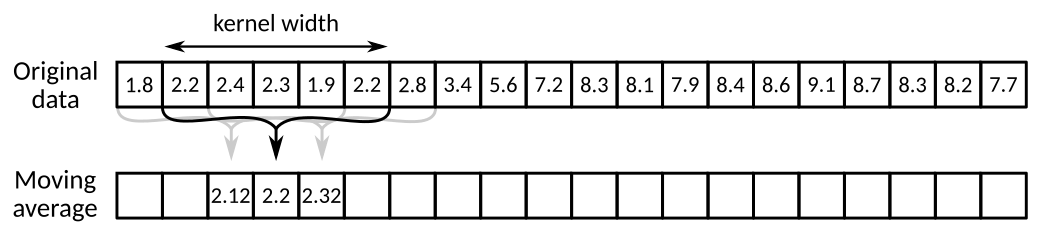

You first task is to create small code snippet, which will produce numpy array `ma` containing moving average of Prague daily temperatures `t_avg` for **kernel width 1 week**, i.e. 7 days. Resulting array `ma` should contain moving averages starting from 1st January 2000 until 31st December 2004. For proper selection of data, you should use date array `dt` to create boolean index.

*You can use `timedelta` function to calculate relative datetimes. See following example.*

In [10]:
today = date.today()
print(f'Today date: {today}')
print(f'Before three days date: {today - timedelta(days=3)}')
print(f'After three days date: {today + timedelta(days=3)}')

Today date: 2021-03-03
Before three days date: 2021-02-28
After three days date: 2021-03-06


Following code calculate array of dates `selected_days` which should correspond to calculated moving average.

In [11]:
date_mask = (dt > date(1999, 12, 31)) & (dt < date(2005, 1, 1))
selected_days = dt[date_mask]
print(f'First day: {selected_days[0]} Last day: {selected_days[-1]}')

First day: 2000-01-01 Last day: 2004-12-31


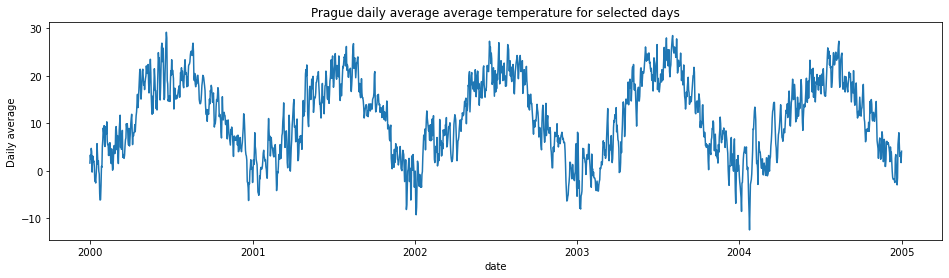

In [12]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(selected_days, t_avg[date_mask])
ax.set_title('Prague daily average average temperature for selected days')
ax.set_xlabel('date')
ax.set_ylabel('Daily average');

**Hint:** Your code should
 - loop over `selected_days`
 - properly select 7 temperature values centered around actual day. Try to create logical expression using `dt` array, so it could be used to select correct values from `t_avg`. See how `date_mask` have been used in above code snippet.
 - append mean of those values to results.

In [13]:
#[your code here]
ma = zeros_like(t_avg[date_mask])

for i, new_dt in enumerate(selected_days):
    new_date_mask = (dt >= new_dt - timedelta(days=3)) & (dt <= new_dt + timedelta(days=3))
    
    ma[i] = t_avg[new_date_mask].mean()

And now we can plot the results...

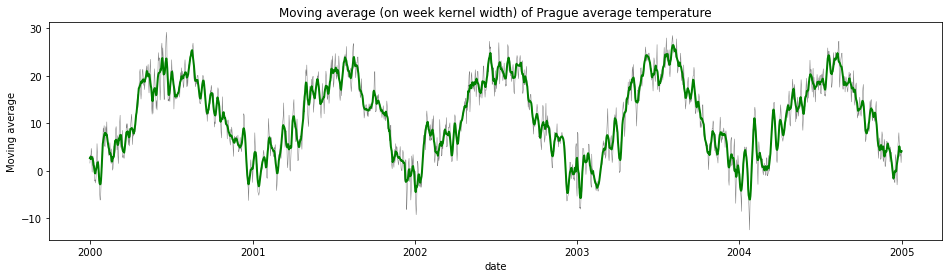

In [14]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(selected_days, t_avg[date_mask], color='gray', lw=0.5)
ax.plot(selected_days, ma, color='green', lw=2)
ax.set_title('Moving average (on week kernel width) of Prague average temperature')
ax.set_xlabel('date')
ax.set_ylabel('Moving average');

### Extreme days

Your second task is to calculate `ma_max` and `ma_min` arrays of 11-day moving average (kernel width is 11 days) for same date range as above from daily temperature extremes, i.e. `ma_min` from `t_min` and `ma_max` from `t_max`.

Once calculated, check on what days, the weekly moving average `ma` was either greater than 11-days moving maximum, or smaller than 11-days moving minimum. In another words, we looking for days, when shortime temperature average is out of bounds of longer period extreme range, i.e. **extreme days**.

Answer the following questions:
 - How many extreme days was in selected date range?
 - In which months the extreme days most commonly occurs?

In [15]:
#[your code here]
# convert first three columns (year, month, day) to array of datetime objects
ma_max = zeros_like(t_max[date_mask])
ma_min = zeros_like(t_min[date_mask])
ma_extr = zeros_like([date_mask])

for i, new_dt in enumerate(selected_days, start=0):
    new_date_mask = (dt >= new_dt - timedelta(days=5)) & (dt <= new_dt + timedelta(days=5))
    ma_max[i] = t_max[new_date_mask].mean()
    ma_min[i] = t_min[new_date_mask].mean()

ma_max
ma_min
#finding extremedays
extr = [] #extremedays
ma_extr = len(ma) * [None]
for i in range(len(selected_days)):
    #ma_extr[i] = np.nan
    if ma[i] > ma_max[i] or ma[i] < ma_min[i]:
        ma_extr[i] = ma[i]
        extr.append(selected_days[i])
extr

[datetime.date(2000, 12, 23),
 datetime.date(2002, 12, 9),
 datetime.date(2002, 12, 10),
 datetime.date(2003, 1, 8),
 datetime.date(2003, 1, 10),
 datetime.date(2004, 2, 4),
 datetime.date(2004, 2, 10),
 datetime.date(2004, 11, 8),
 datetime.date(2004, 12, 13)]

### Plot calculated values

Create code which will create plot containing:
 - filled area bounded by 11-days moving minimum and maximum. *Use `color="green"` and transparency `alpha=0.5`*
 - line of weekly moving average. *Use `color="RoyalBlue"` and line width `lw=2`*
 - red stars on weekly moving average line for extreme days. *Use red star marker `r*` and marker size `ma=10`*

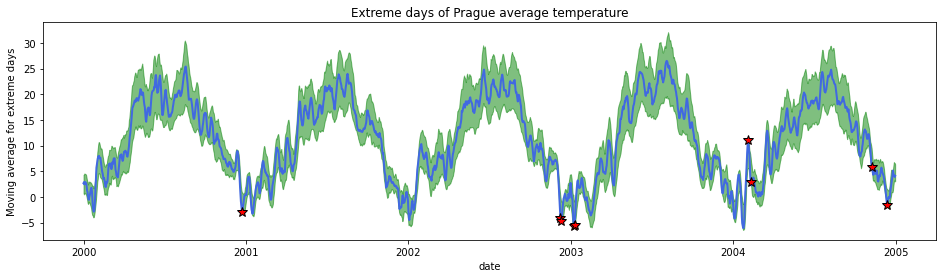

In [16]:
#[your code here]
fig, ax = plt.subplots ( figsize = (16, 4)) 
ax.plot (selected_days, ma, color = 'RoyalBlue', lw = 2) 
ax.fill_between (selected_days, ma_max, ma_min, color = 'green', alpha = 0.5)
ax.plot(selected_days, ma_extr, marker = '*', markerfacecolor = 'red', markersize = 10, color = 'None')
ax.set_title('Extreme days of Prague average temperature')
ax.set_xlabel('date')
ax.set_ylabel('Moving average for extreme days');

### Most common daily temperature variation

Your last task is to calculate daily temperature variation `t_var`, defined as difference betwen daily maximum `t_max` and daily minimum `t_min`. Plot histogram of those values and find out which value is most common.

For plotting histogram, try to change number of bins and select best value, so resulting histogram will balance visual appearance and will be still informative about how data are distributed.

Answer following questions:
 - Are the daily variations normaly distributed?
 - On what date the daily temperature variation was minimal?
 - On what date the daily temperature variation was maximal?

(0.39999999999999947, 21.2)

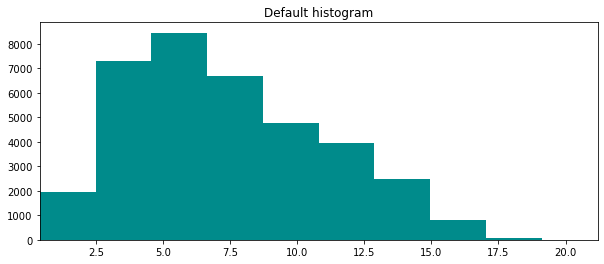

In [18]:
#[your code here]
t_var = t_max - t_min
#n = random.randn(100000)
fig, ax = plt.subplots(figsize=(10,4))

ax.hist(t_var, color='darkcyan', lw=0.1)
ax.set_title("Default histogram")
ax.set_xlim((min(t_var), max(t_var)))